<a href="https://colab.research.google.com/github/merkarii/CustomerSegmentation/blob/main/CustomerSegmenting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

pip install seaborn



                                              0.0/293.3 kB ? eta -:--:--
     ----------                              81.9/293.3 kB 2.3 MB/s eta 0:00:01
     ---------------------                  163.8/293.3 kB 2.0 MB/s eta 0:00:01
     ----------------------                 174.1/293.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install scikit-learn


                                              0.0/8.3 MB ? eta -:--:--
                                              0.1/8.3 MB 1.8 MB/s eta 0:00:05
                                              0.2/8.3 MB 1.8 MB/s eta 0:00:05
                                              0.2/8.3 MB 1.8 MB/s eta 0:00:05
     -                                        0.3/8.3 MB 1.9 MB/s eta 0:00:05
     -                                        0.4/8.3 MB 1.8 MB/s eta 0:00:05
     --                                       0.5/8.3 MB 1.8 MB/s eta 0:00:05
     --                                       0.5/8.3 MB 1.9 MB/s eta 0:00:05
     --                                       0.6/8.3 MB 1.8 MB/s eta 0:00:05
     ---                                      0.7/8.3 MB 1.7 MB/s eta 0:00:05
     ---                                      0.7/8.3 MB 1.9 MB/s eta 0:00:05
     ---                                      0.8/8.3 MB 1.8 MB/s eta 0:00:05
     ----                                     0.9/8.3 MB 1.8 MB/s eta 0


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000  

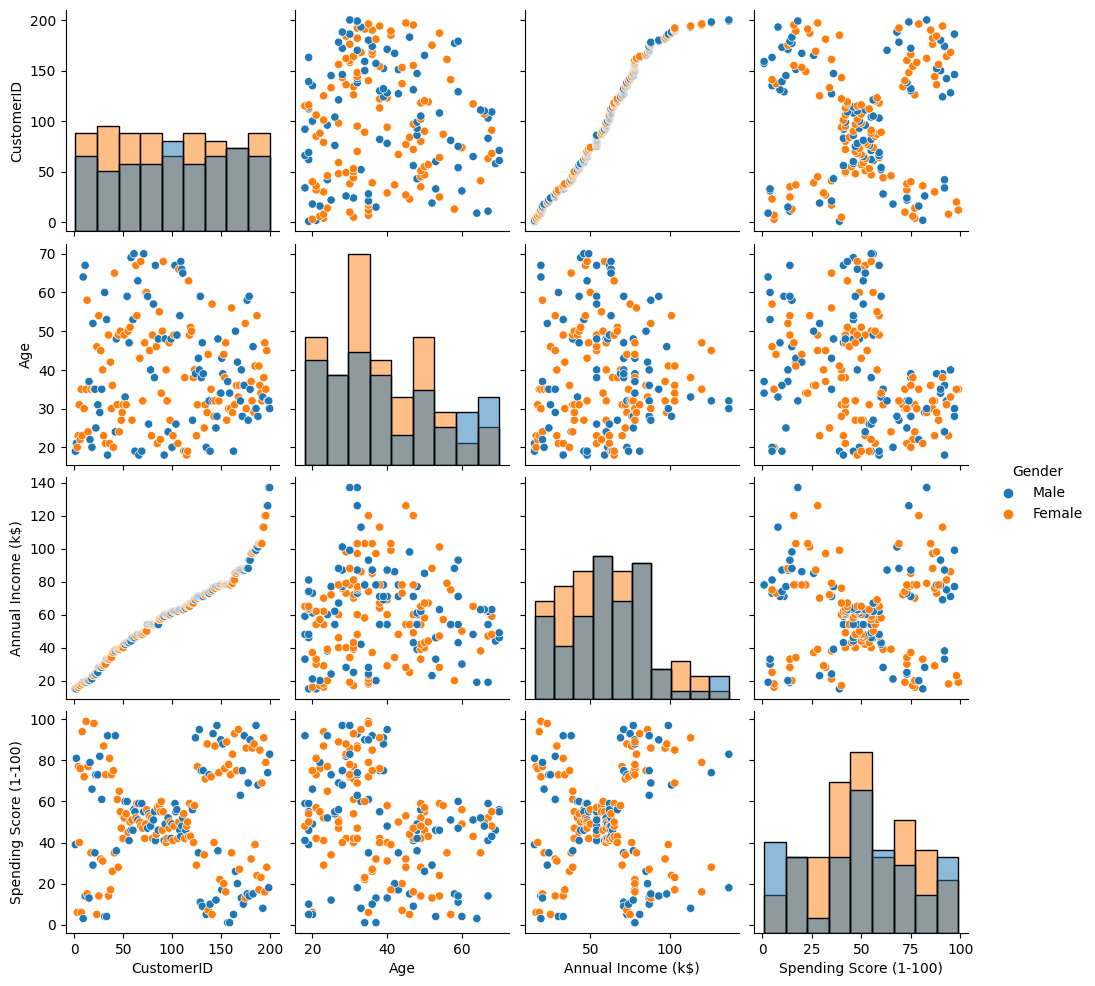

In [ ]:
# Pairplot for initial visualization
sns.pairplot(data, hue='Gender', diag_kind='hist')
plt.show()


In [ ]:
# Convert gender to numerical values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Drop 'CustomerID' column as it's not relevant
data = data.drop('CustomerID', axis=1)

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

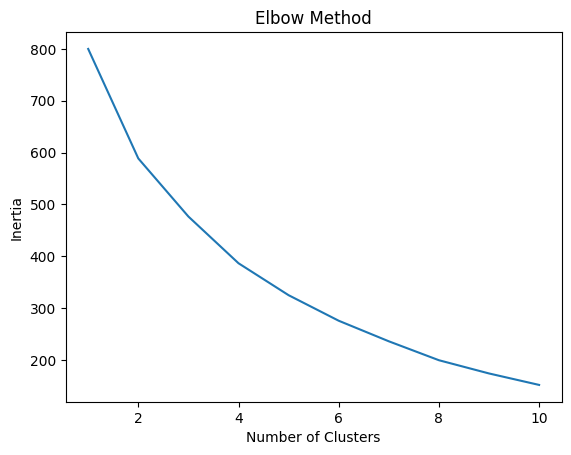

In [ ]:
# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
# Fit the k-Means model
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = labels


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


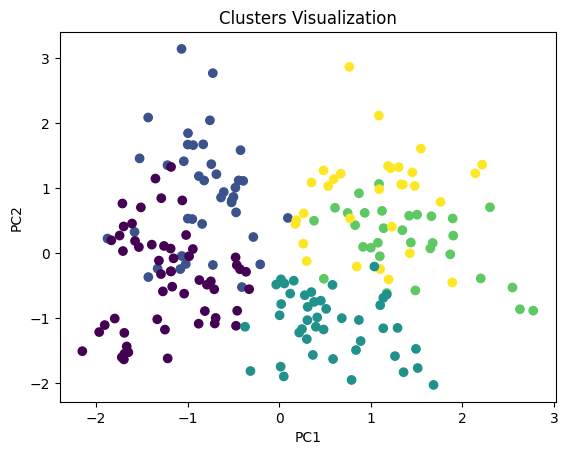

In [ ]:
# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
principal_df["Cluster"] = labels

plt.scatter(principal_df["PC1"], principal_df["PC2"], c=principal_df["Cluster"], cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters Visualization")
plt.show()


In [ ]:
# Display the average values for each cluster
print(data.groupby("Cluster").mean())


           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        1.000000  28.345455           60.800000               68.654545
1        0.000000  28.250000           62.000000               71.675000
2        1.000000  48.720930           46.186047               39.674419
3        0.000000  55.903226           48.774194               38.806452
4        0.451613  40.419355           90.000000               15.741935
